In [1]:
library(dplyr)
library(tidyr)
library(pheatmap)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
df<-read.csv('aerts_8genes_clustered_annotated.csv',header = T)

# How to summarise data with dplyr
We have a data frame with 10 columns, 8 of which are features i.e. gene expression, and two columns with meta data. 
The first column indicates the cell type, a label that represents the annotation given by the authors in the original publication after careful examination of the gene expression profiles of each cell. Here we only have 8 genes, by the authors had access to ~20k genes and made the annotation based on that. 

In [3]:
head(df)

cell_type,seurat_clusters,cell,ChAT,fru,Gad1,ple,SerT,sNPF,Tbh,VGlut
<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G-KC - Cluster 8,2,ACATACGAGGGCTTCC-DGRP-551_0d_r1,1.384796,1.944198,0.000000,0,0,2.770716,0,0.000000
G-KC - Cluster 8,2,ACCCACTTCACTCTTA-DGRP-551_0d_r1,1.157952,2.477969,0.000000,0,0,3.581698,0,1.157952
G-KC - Cluster 8,2,ACTTACTAGTGGTAAT-DGRP-551_0d_r1,0.000000,1.481388,1.481388,0,0,2.890107,0,0.000000
G-KC - Cluster 8,2,ACTTGTTCATGGTTGT-DGRP-551_0d_r1,0.000000,1.875620,0.000000,0,0,3.139809,0,0.000000
G-KC - Cluster 8,2,ACTTTCATCAATAAGG-DGRP-551_0d_r1,0.000000,1.792802,0.000000,0,0,2.141170,0,0.000000
G-KC - Cluster 8,2,AGATCTGCAACAACCT-DGRP-551_0d_r1,1.188948,0.000000,0.000000,0,0,3.070498,0,1.716902


In [8]:

df %>%  gather('gene','expr',ChAT:VGlut) %>% group_by(cell_type,gene) %>% summarise(mean_expr = mean(expr)) %>% spread(gene,mean_expr) -> expr_mat

In [14]:

mat = as.matrix(expr_mat[,-1])
row.names(mat)<-expr_mat$cell_type

quantile_breaks <- function(xs, n = 10) {
    breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
    breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(mat, n = 50)


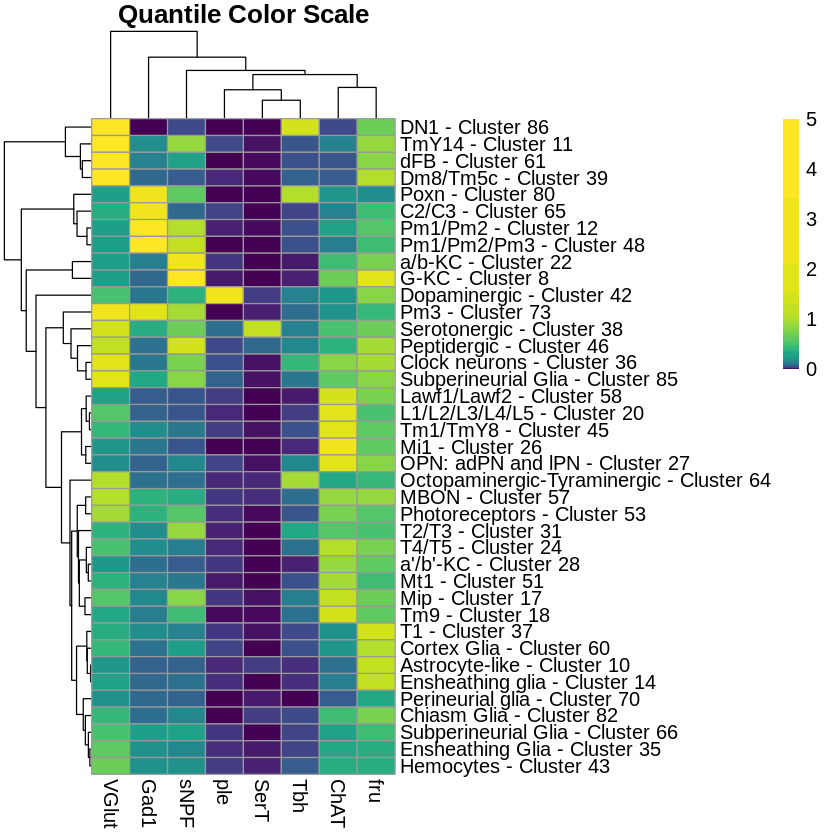

In [15]:

library(viridis)

pheatmap(
    mat               = mat,
    color             = viridis(length(mat_breaks) - 1),
    breaks            = mat_breaks,
    fontsize          = 12,
    main              = "Quantile Color Scale",
    width = 12,
    height = 20
)